In [6]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
df = pd.read_csv('train.csv')

In [9]:
# Imputación de valores nulos
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna('Desconocido')

In [10]:
y = df['RENDIMIENTO_GLOBAL']  # Variable objetivo original


cat_cols = cat_cols.drop('RENDIMIENTO_GLOBAL')


In [11]:
# Codificación one-hot solo para las categóricas
X = pd.get_dummies(df.drop('RENDIMIENTO_GLOBAL', axis=1), columns=cat_cols, drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
# Entrenar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predicción
y_pred = clf.predict(X_test)

In [15]:
# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        alto       0.51      0.61      0.56     35124
        bajo       0.43      0.51      0.47     34597
  medio-alto       0.31      0.24      0.27     34324
  medio-bajo       0.31      0.26      0.28     34455

    accuracy                           0.41    138500
   macro avg       0.39      0.40      0.39    138500
weighted avg       0.39      0.41      0.39    138500



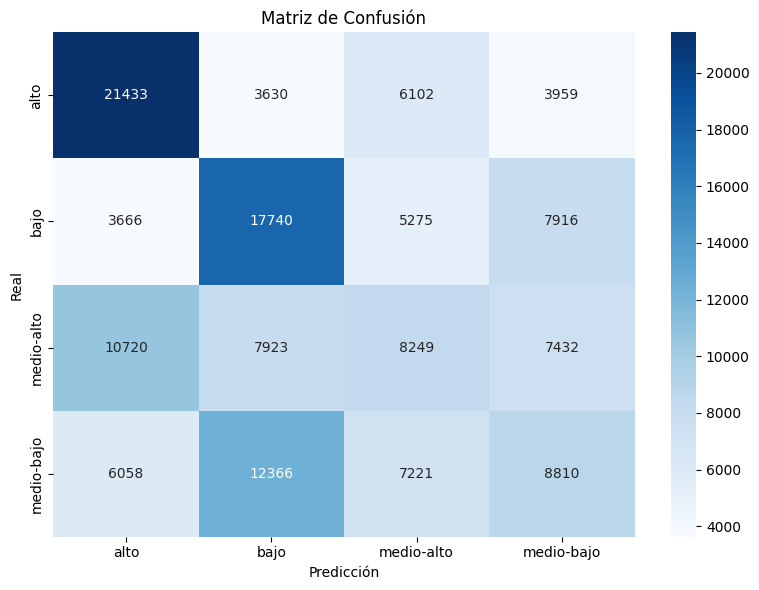

In [16]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

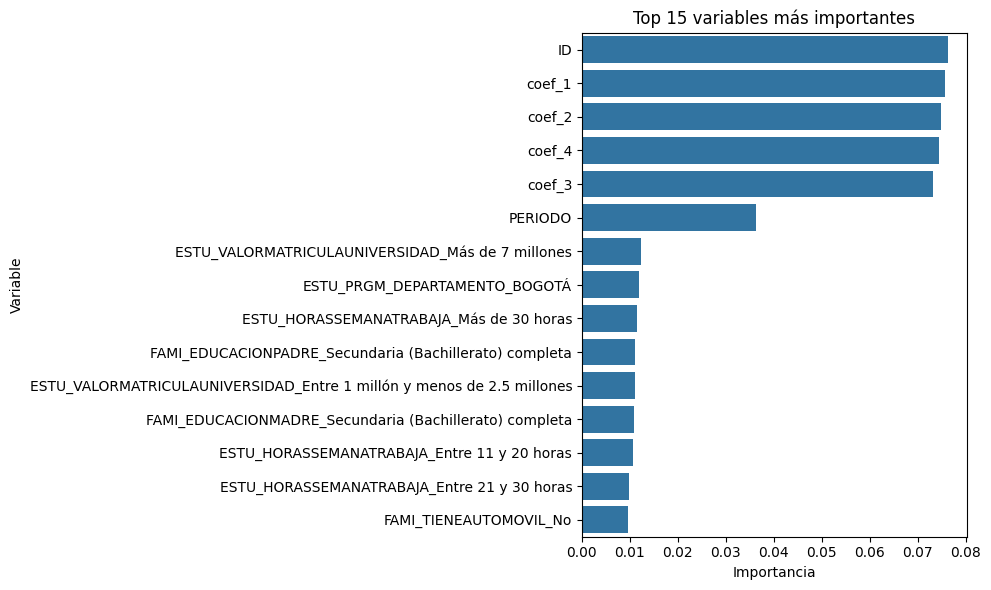

In [17]:
# Importancia de características

importancias = pd.Series(clf.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=importancias.values, y=importancias.index)
plt.title("Top 15 variables más importantes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()